### Part 3 - Feature Engineering

This jupyter notebook does feature engineering for Machine Learning of Energy Dataset.

** What is Feature Engineering ???**

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

A feature is important if it is highly correlated with the dependable variable(appliance).

In [164]:
#load libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from datetime import datetime as dt

In [165]:
#read csv
train_data = pd.read_csv("F:\\ADS\\Assignment 2\\training.csv")

### Training Dataset

In [166]:
train_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,65400,Weekday,Monday
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,66000,Weekday,Monday
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,66600,Weekday,Monday
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,734.500000,91.000000,6.000000,40.000000,4.600000,34.351142,34.351142,68400,Weekday,Monday
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,...,734.616667,90.500000,6.000000,40.000000,4.516667,19.205186,19.205186,69000,Weekday,Monday


### Feature Scaling

It is a method to compare the range of the variables on common grounds.

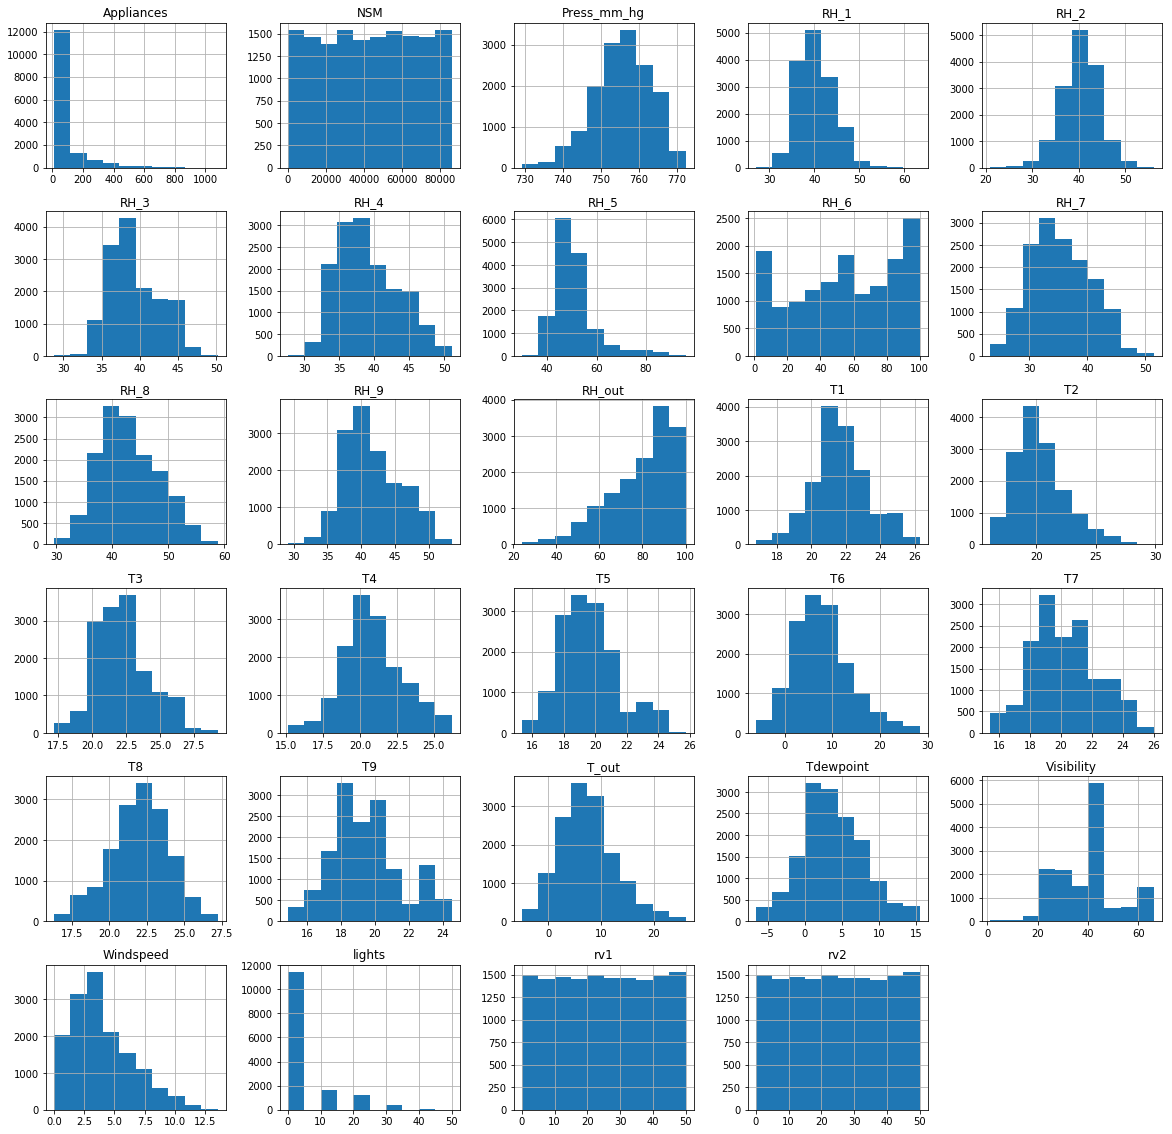

In [167]:
import matplotlib.pyplot as plt
train_data[train_data.dtypes[(train_data.dtypes=="float64")|(train_data.dtypes=="int64")].index.values].hist(figsize=[20,20])
plt.show()

From the above graph we conclude that:
- RH_1 & RH_2 are mirror image of each other but are in same range.
- RH_1, RH_2, RH_3, RH_7, RH_8, RH_9 are in similar range
- T_out & Tdewpoint are in similar range
- rv1 & rv2 have similar range
- T1,T2,T3,T4,T5 all have their highest peak at 20 Celsius

In [43]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages


In [168]:
train_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,65400,Weekday,Monday
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,66000,Weekday,Monday
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,66600,Weekday,Monday
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,734.500000,91.000000,6.000000,40.000000,4.600000,34.351142,34.351142,68400,Weekday,Monday
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,...,734.616667,90.500000,6.000000,40.000000,4.516667,19.205186,19.205186,69000,Weekday,Monday


From above list of variables, we can see that there are 2 variables - **WeekStatus and Day_of_week** which are categorical data and we have to convert them to numerical data in order to work on machine learning algorithms. Hence, we need to perform **One Hot Encoding technique of feature engineering.**

### Feature engineering

In order to predict the energy consumption, we need to understand the energy consumption per hour, per day and even per month. Hence,need to further understand these, we need to extract the year,month, weekday,hours, minutes and seconds from the data variable.

In [169]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [170]:
train_data['time'] = train_data['date'].dt.strftime('%H:%M:%S')

In [171]:
train_data['hours'] = train_data['date'].dt.strftime('%H')

In [172]:
train_data['minutes'] = train_data['date'].dt.strftime('%M')

In [173]:
train_data['seconds'] = train_data['date'].dt.strftime('%S')

In [174]:
train_data['month'] = train_data['date'].dt.strftime('%m')

In [175]:
train_data['year'] = train_data['date'].dt.strftime('%Y')

In [176]:
train_data['weekNo'] = train_data['date'].dt.strftime('%U')

In [178]:
train_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,WeekStatus,Day_of_week,time,hours,minutes,seconds,month,year,weekNo,weekday_No
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,Weekday,Monday,17:00:00,17,00,00,01,2016,02,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,Weekday,Monday,17:10:00,17,10,00,01,2016,02,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,Weekday,Monday,17:20:00,17,20,00,01,2016,02,1
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,Weekday,Monday,17:40:00,17,40,00,01,2016,02,1
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,Weekday,Monday,17:50:00,17,50,00,01,2016,02,1
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,Weekday,Monday,18:10:00,18,10,00,01,2016,02,1
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,Weekday,Monday,18:20:00,18,20,00,01,2016,02,1
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,Weekday,Monday,18:30:00,18,30,00,01,2016,02,1
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,Weekday,Monday,19:00:00,19,00,00,01,2016,02,1
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,...,Weekday,Monday,19:10:00,19,10,00,01,2016,02,1


### Categorical data

Machine learning algorithms cannot work with categorical data directly.The training data has few categorical data columns which has to be converted to numerical data in order to apply prediction algorithms. 

The categorical columns present in the dataset are shown below:

In [74]:
cat_features = train_data.select_dtypes(include=['object']).copy()
cat_features.head()

,date,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,Weekday,Monday
1,2016-01-11 17:10:00,Weekday,Monday
2,2016-01-11 17:20:00,Weekday,Monday
3,2016-01-11 17:40:00,Weekday,Monday
4,2016-01-11 17:50:00,Weekday,Monday


#### Day_of_week into numerical column
Training data contains Day_of_week which can be converted into numerical column using strftime method of datetime.

In [180]:
train_data['weekday_No'] = energy_data['date'].dt.strftime('%w')

#### WeekStatus into numerical column

In [183]:
cat_features["WeekStatus"].value_counts()

Weekday    10720
Weekend     4083
Name: WeekStatus, dtype: int64

In [184]:
train_data['WeekStatus_No'] = train_data['WeekStatus'].map( {'Weekday':1, 'Weekend':0} )

### Drop categorical columns

In [186]:
train_data.drop(['WeekStatus'],axis=1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Day_of_week,time,hours,minutes,seconds,month,year,weekNo,weekday_No,WeekStatus_No
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,Monday,17:00:00,17,00,00,01,2016,02,1,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,Monday,17:10:00,17,10,00,01,2016,02,1,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,Monday,17:20:00,17,20,00,01,2016,02,1,1
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,Monday,17:40:00,17,40,00,01,2016,02,1,1
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,Monday,17:50:00,17,50,00,01,2016,02,1,1
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,Monday,18:10:00,18,10,00,01,2016,02,1,1
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,Monday,18:20:00,18,20,00,01,2016,02,1,1
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,Monday,18:30:00,18,30,00,01,2016,02,1,1
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,Monday,19:00:00,19,00,00,01,2016,02,1,1
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,...,Monday,19:10:00,19,10,00,01,2016,02,1,1


In [190]:
train_data.drop(['Day_of_week'],axis=1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,WeekStatus,time,hours,minutes,seconds,month,year,weekNo,weekday_No,WeekStatus_No
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,Weekday,17:00:00,17,00,00,01,2016,02,1,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,Weekday,17:10:00,17,10,00,01,2016,02,1,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,Weekday,17:20:00,17,20,00,01,2016,02,1,1
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,Weekday,17:40:00,17,40,00,01,2016,02,1,1
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,Weekday,17:50:00,17,50,00,01,2016,02,1,1
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,Weekday,18:10:00,18,10,00,01,2016,02,1,1
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,Weekday,18:20:00,18,20,00,01,2016,02,1,1
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,Weekday,18:30:00,18,30,00,01,2016,02,1,1
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,Weekday,19:00:00,19,00,00,01,2016,02,1,1
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,...,Weekday,19:10:00,19,10,00,01,2016,02,1,1


In [188]:
train_data.drop(['date'],axis =1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Day_of_week,time,hours,minutes,seconds,month,year,weekNo,weekday_No,WeekStatus_No
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,Monday,17:00:00,17,00,00,01,2016,02,1,1
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,Monday,17:10:00,17,10,00,01,2016,02,1,1
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,Monday,17:20:00,17,20,00,01,2016,02,1,1
3,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,Monday,17:40:00,17,40,00,01,2016,02,1,1
4,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,Monday,17:50:00,17,50,00,01,2016,02,1,1
5,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,Monday,18:10:00,18,10,00,01,2016,02,1,1
6,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,Monday,18:20:00,18,20,00,01,2016,02,1,1
7,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,...,Monday,18:30:00,18,30,00,01,2016,02,1,1
8,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,46.363333,...,Monday,19:00:00,19,00,00,01,2016,02,1,1
9,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,47.223333,...,Monday,19:10:00,19,10,00,01,2016,02,1,1


In [191]:
train_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Day_of_week,time,hours,minutes,seconds,month,year,weekNo,weekday_No,WeekStatus_No
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,Monday,17:00:00,17,00,00,01,2016,02,1,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,Monday,17:10:00,17,10,00,01,2016,02,1,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,Monday,17:20:00,17,20,00,01,2016,02,1,1
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,Monday,17:40:00,17,40,00,01,2016,02,1,1
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,Monday,17:50:00,17,50,00,01,2016,02,1,1
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,Monday,18:10:00,18,10,00,01,2016,02,1,1
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,Monday,18:20:00,18,20,00,01,2016,02,1,1
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,Monday,18:30:00,18,30,00,01,2016,02,1,1
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,Monday,19:00:00,19,00,00,01,2016,02,1,1
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,...,Monday,19:10:00,19,10,00,01,2016,02,1,1


In [192]:
train_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week', 'time', 'hours', 'minutes', 'seconds', 'month', 'year',
       'weekNo', 'weekday_No', 'WeekStatus_No'],
      dtype='object')